In [94]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.5.1'

In [95]:
start = 0
end = 1
step = 0.02
w= 0.7
b=0.3

X = torch.arange(start,end,step).unsqueeze(dim=1)
X.shape

y = w*X + b

In [96]:
y

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [0.5100],
        [0.5240],
        [0.5380],
        [0.5520],
        [0.5660],
        [0.5800],
        [0.5940],
        [0.6080],
        [0.6220],
        [0.6360],
        [0.6500],
        [0.6640],
        [0.6780],
        [0.6920],
        [0.7060],
        [0.7200],
        [0.7340],
        [0.7480],
        [0.7620],
        [0.7760],
        [0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460],
        [0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [97]:
len(y)

50

In [98]:
# Split data
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]


X_test, y_test = X[train_split:], y[train_split:]



In [99]:
len(X_train) , len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

In [100]:
# figure

plt.figure(figsize=(10,7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

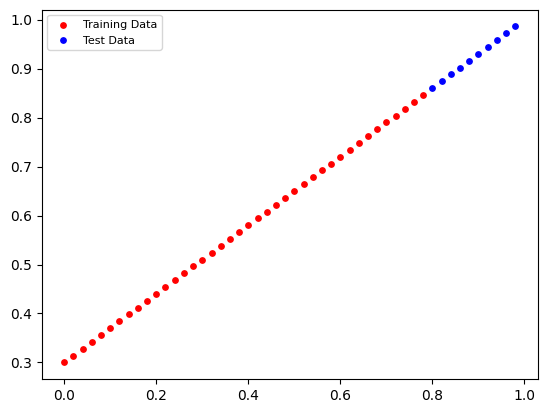

In [101]:
plt.scatter(X_train, y_train, c="r", s=15, label="Training Data" )
plt.scatter(X_test, y_test, c="b", s=15, label="Test Data")

plt.legend(prop={"size": 8});


In [102]:
# neural network
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    
    
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [103]:
torch.randn(1)

tensor([0.3367])

In [104]:
torch.manual_seed(42)

models = NeuralNetwork()

list(models.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [105]:
models.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [106]:
# preditc

with torch.inference_mode():
    y_pred = models(X_test)

In [107]:
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

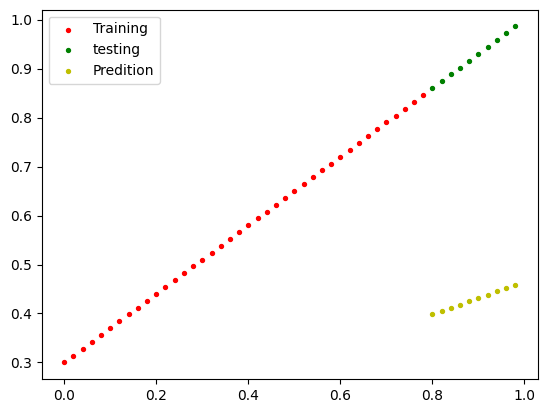

In [108]:
plt.scatter(X_train,y_train, c="r", s=8, label="Training")
plt.scatter(X_test,y_test,c="g", s=8, label="testing")

plt.scatter(X_test,y_pred, c='y', s=8, label="Predition" )

plt.legend()

In [109]:
# lets creat ethe b loss function and optimizer
loss_fn = nn.L1Loss() # mean absloute error
optimizer = torch.optim.SGD(params=models.parameters(), lr=0.01)


In [110]:
optimizer.zero_grad()

In [117]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []


for epoch in range(epochs):
    
    models.train()
    
    y_preds = models(X_train)
    
    loss = loss_fn(y_preds, y_train)
      
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    
    models.eval()
    
    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = models(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
        
    
    





Epoch: 0 | MAE Train Loss: 0.024458957836031914 | MAE Test Loss: 0.05646304413676262 
Epoch: 10 | MAE Train Loss: 0.021020209416747093 | MAE Test Loss: 0.04819049686193466 
Epoch: 20 | MAE Train Loss: 0.01758546754717827 | MAE Test Loss: 0.04060482233762741 
Epoch: 30 | MAE Train Loss: 0.014155392535030842 | MAE Test Loss: 0.03233227878808975 
Epoch: 40 | MAE Train Loss: 0.010716588236391544 | MAE Test Loss: 0.024059748277068138 
Epoch: 50 | MAE Train Loss: 0.0072835348546504974 | MAE Test Loss: 0.016474086791276932 
Epoch: 60 | MAE Train Loss: 0.003851778106763959 | MAE Test Loss: 0.008201557211577892 
Epoch: 70 | MAE Train Loss: 0.00893248151987791 | MAE Test Loss: 0.005023092031478882 
Epoch: 80 | MAE Train Loss: 0.00893248151987791 | MAE Test Loss: 0.005023092031478882 
Epoch: 90 | MAE Train Loss: 0.00893248151987791 | MAE Test Loss: 0.005023092031478882 


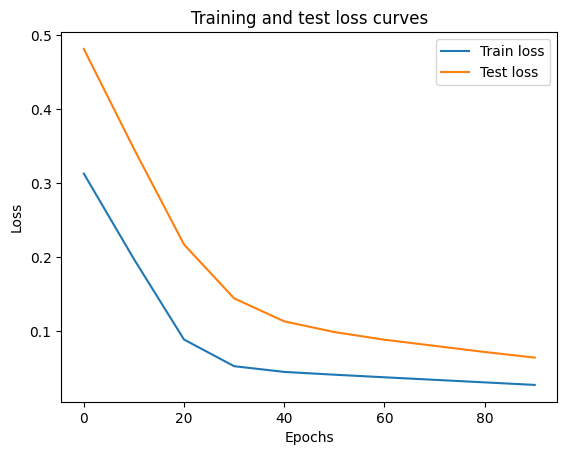

In [112]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [113]:
models.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [114]:
# 1. Set the model in evaluation mode
models.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = models(X_test)
y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

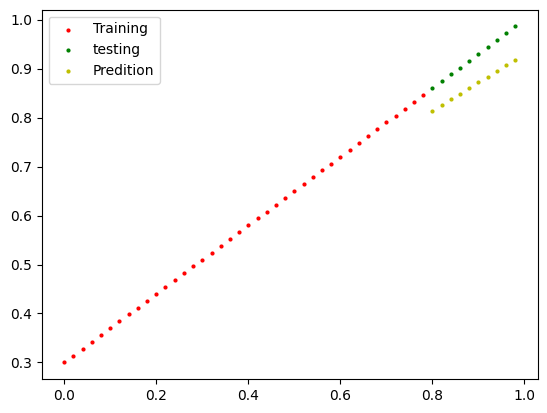

In [116]:
plt.scatter(X_train,y_train, c="r", s=4, label="Training")
plt.scatter(X_test,y_test,c="g", s=4, label="testing")

plt.scatter(X_test,y_preds, c='y', s=4, label="Predition" )

plt.legend()